In [21]:
# get data

import os
import tarfile
import urllib
DOWNLOAD_ROOT = "http://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [23]:
# load data 

import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing_data = load_housing_data()
housing_data.head(20)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [25]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


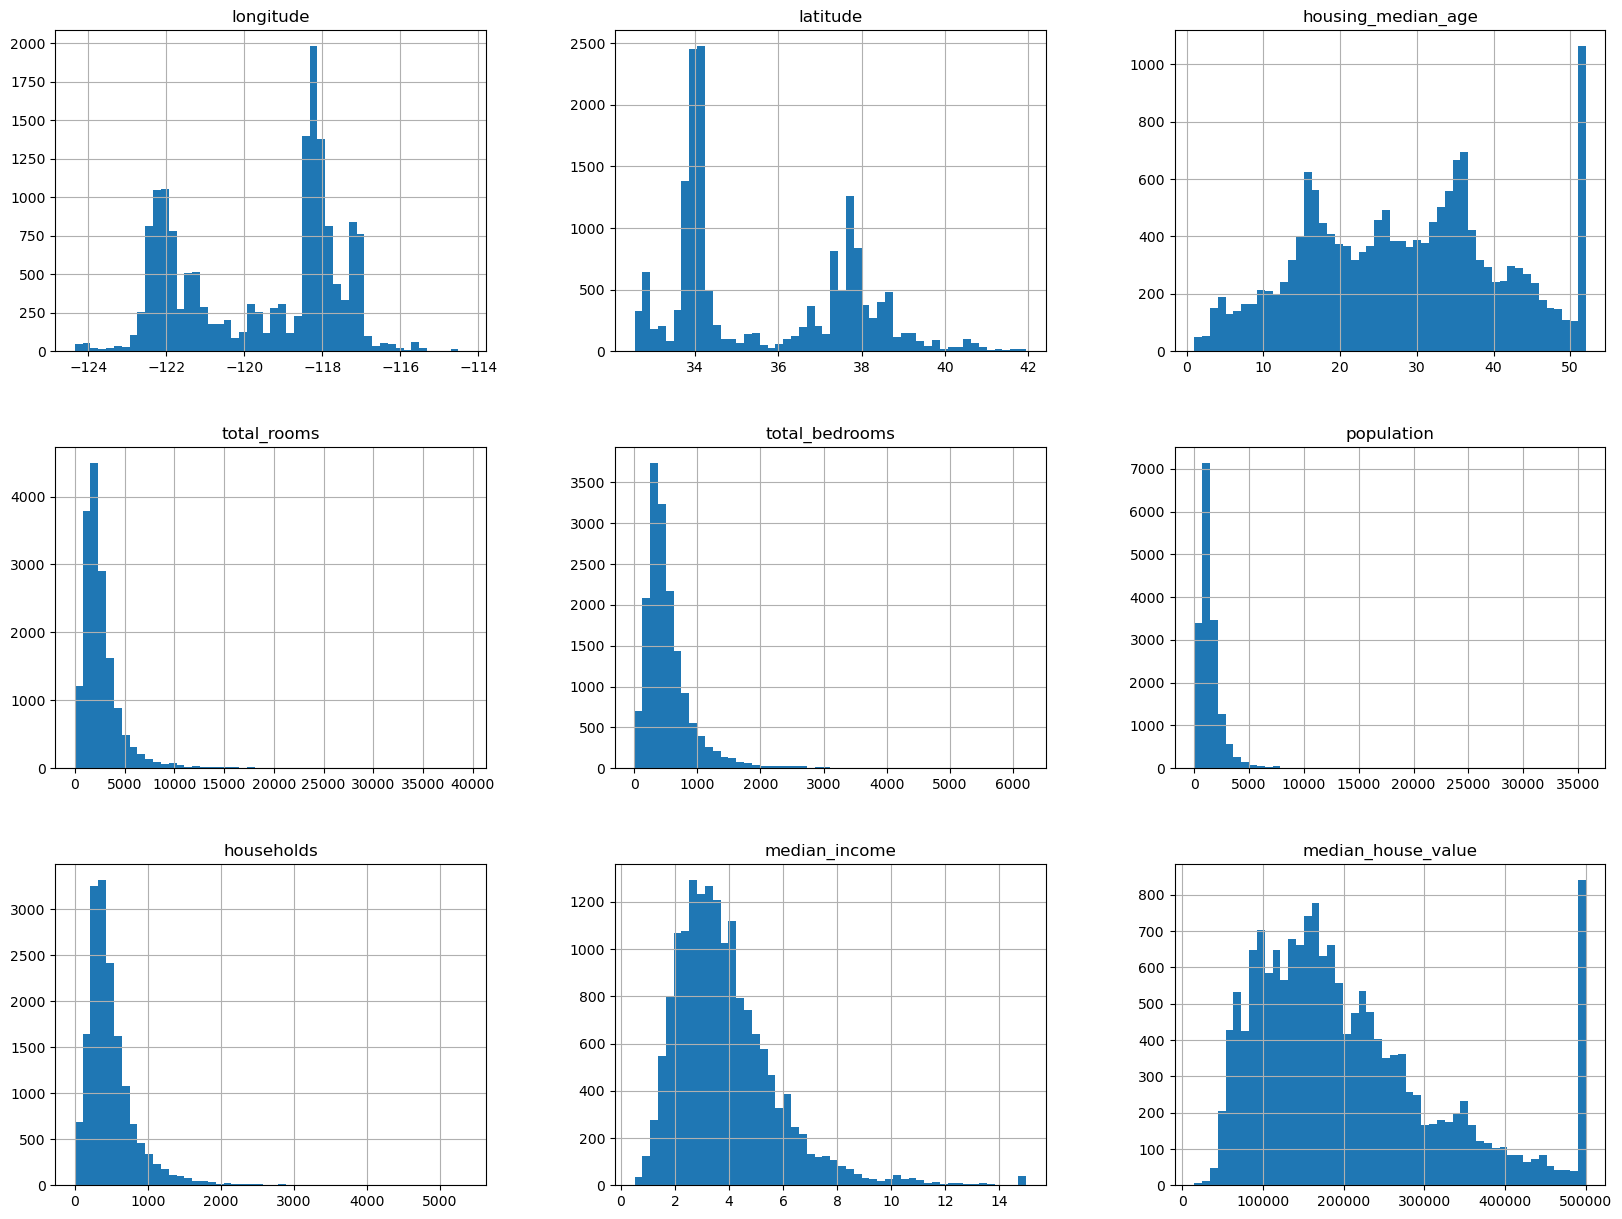

In [27]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(20,15))
plt.show()

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels=[1, 2, 3, 4, 5])
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

KeyError: '[16060, 17, 6187, 16092, 3729, 1419, 11672, 13894, 10769, 9769, 4544, 10569, 8074, 5593, 4038, 1838, 13606, 4457, 5376, 13661, 2194, 13524, 4141, 8606, 6188, 5550, 1765, 11649, 12311, 12259, 11312, 8002, 15952, 12033, 15169, 16066, 5358, 6599, 12160, 10458, 16403, 12117, 9019, 2709, 9896, 116, 5397, 3092, 12665, 2130, 10767, 3509, 7176, 15741, 10582, 15491, 8573, 10871, 11265, 5988, 4881, 14704, 11425, 16182, 10267, 13837, 9802, 9823, 5617, 10674, 13097, 11423, 5094, 5784, 6928, 9908, 10834, 15190, 8516, 1662, 15443, 7683, 2569, 998, 11977, 11880, 10555, 14612, 8111, 7623, 8518, 3091, 2518, 13580, 263, 13289, 6775, 970, 761, 6619, 4262, 5985, 2349, 11670, 7516, 8789, 9282, 7468, 3518, 12432, 15684, 11603, 9920, 5072, 7342, 7094, 15030, 5591, 9349, 4396, 7100, 7326, 13436, 4144, 8931, 8993, 7916, 10486, 1636, 10336, 7207, 470, 3859, 11523, 2484, 11972, 3952, 2843, 8494, 1766, 9574, 2890, 2834, 16290, 13692, 13234, 5568, 4280, 5899, 14830, 9406, 14425, 3189, 918, 674, 4105, 9101, 13991, 16253, 12745, 14490, 6826, 7755, 16413, 10129, 11352, 6890, 7681, 6951, 16304, 6604, 12268, 9872, 6595, 11051, 2246, 5814, 6325, 13192, 5134, 7824, 517, 3719, 14261, 2053, 6373, 15156, 15677, 1702, 8602, 753, 9332, 3891, 6110, 7432, 12407, 16444, 6425, 9337, 11298, 10090, 3663, 4803, 4678, 5415, 8546, 1166, 8103, 6221, 6785, 4359, 12367, 8495, 3845, 10866, 8680, 971, 10902, 2471, 5800, 3328, 10201, 1549, 5819, 11397, 3843, 3936, 9934, 7994, 15752, 101, 7709, 13690, 1783, 1521, 2503, 16250, 15382, 3251, 5871, 10669, 7245, 13309, 16237, 12642, 951, 12448, 14547, 726, 13583, 15646, 8432, 610, 6901, 4728, 9849, 14515, 10030, 15529, 896, 14185, 16006, 14294, 12461, 2739, 750, 12769, 1503, 4939, 11685, 7012, 14189, 6483, 14394, 10541, 13, 1108, 15262, 4785, 8185, 10315, 2671, 11005, 11340, 3602, 4487, 5000, 15211, 2391, 7145, 9432, 13582, 1450, 14044, 14199, 4106, 6500, 1694, 5387, 11406, 12144, 16474, 11639, 10332, 5126, 1032, 443, 11599, 15763, 4843, 9886, 12697, 15182, 14354, 9360, 9283, 15556, 2386, 14957, 9528, 8264, 2789, 6289, 6997, 7555, 10146, 16371, 7958, 12455, 10382, 14481, 5761, 9713, 2975, 8621, 6701, 15785, 7394, 9758, 747, 2240, 11801, 8742, 8508, 12756, 7314, 15498, 3837, 15939, 968, 15671, 13541, 11286, 15433, 2487, 12374, 3587, 16383, 11240, 6156, 5671, 491, 10404, 1924, 5065, 8130, 3866, 5888, 8658, 2263, 14596, 936, 14422, 14972, 3190, 15015, 11045, 14281, 1084, 10473, 16140, 3529, 5187, 3591, 1941, 11098, 5611, 15098, 1910, 10099, 15863, 6341, 14338, 75, 16276, 758, 10380, 2544, 14265, 8272, 8210, 3628, 16323, 12820, 8781, 13557, 13227, 3359, 12388, 15379, 4564, 10967, 10584, 6447, 6420, 7593, 13636, 3561, 7736, 10998, 9079, 10742, 12047, 396, 15570, 12042, 16258, 5136, 14811, 12896, 11208, 4641, 5078, 5225, 466, 15713, 10125, 1295, 6178, 10010, 15608, 11190, 804, 2077, 333, 7312, 9781, 248, 13555, 13586, 8923, 12825, 13493, 15688, 1952, 9680, 6360, 14992, 9743, 12638, 4655, 2261, 3252, 7292, 15909, 6863, 11485, 16212, 1072, 8345, 2530, 10995, 13959, 6124, 619, 11179, 2865, 15, 11154, 10927, 14047, 5878, 9233, 4148, 704, 15264, 13343, 8033, 10216, 9735, 7568, 8114, 1279, 4439, 2014, 9648, 7806, 10469, 10909, 5212, 12224, 5261, 8098, 16459, 8280, 1304, 1180, 13597, 16265, 11728, 11319, 10533, 16302, 3513, 15243, 126, 3933, 13829, 4427, 3685, 5379, 12596, 14564, 12726, 2468, 13960, 10452, 7543, 10970, 14550, 9836, 8847, 7457, 9188, 4599, 11736, 14924, 11651, 2597, 37, 4588, 8846, 15748, 16054, 9663, 14782, 6945, 14733, 11930, 11721, 14685, 7960, 8076, 1034, 16127, 14671, 15200, 8038, 12456, 12994, 1110, 10105, 14655, 2584, 15224, 13696, 15183, 13243, 4569, 4191, 6022, 3822, 13087, 10314, 6321, 3730, 11966, 8016, 8645, 14529, 14566, 11571, 2552, 11301, 2893, 9021, 928, 9618, 12213, 6302, 14284, 14479, 11333, 5961, 11695, 1418, 12941, 15331, 6043, 11753, 6159, 5879, 5062, 11178, 8316, 3173, 2511, 5812, 6412, 3433, 8574, 15795, 3921, 1739, 7658, 9685, 2147, 15279, 13432, 10108, 13587, 6502, 4962, 6824, 3846, 15125, 14628, 4067, 731, 1010, 12968, 1819, 3175, 2342, 3072, 10593, 280, 1668, 9847, 8919, 10024, 946, 2447, 12544, 10191, 8551, 10238, 12810, 6995, 16009, 11195, 16048, 13107, 5152, 4532, 10468, 13081, 5547, 159, 7198, 732, 13502, 799, 4871, 6669, 2855, 14331, 9001, 11247, 12848, 12310, 12555, 8365, 3589, 12302, 13116, 9878, 3995, 11807, 10278, 3294, 12204, 3152, 12958, 8616, 6310, 4614, 13198, 13981, 3056, 11944, 3911, 5160, 15007, 11354, 4199, 14010, 4103, 15281, 12536, 13009, 1048, 157, 318, 14348, 2186, 11316, 12721, 4642, 4513, 3275, 4146, 15086, 3899, 9489, 2925, 14959, 12003, 13975, 4596, 9218, 16307, 13674, 13285, 8125, 1164, 15770, 5928, 9284, 1263, 12800, 9677, 4953, 11003, 11272, 11438, 12384, 14668, 5705, 2591, 2743, 3138, 7275, 2152, 3009, 4309, 1025, 15392, 13125, 13164, 10518, 1239, 6058, 4149, 5950, 2540, 14289, 10008, 13794, 4657, 4498, 16377, 4520, 900, 728, 15070, 5239, 8402, 16301, 10005, 6113, 247, 3925, 8496, 9300, 10490, 1011, 10021, 8201, 7608, 6478, 375, 10226, 1398, 13978, 7390, 10534, 7598, 10821, 54, 4233, 11108, 4104, 4366, 9428, 11483, 2433, 12496, 9989, 8507, 6721, 15123, 2379, 3325, 12763, 14701, 3208, 5859, 7235, 14841, 12599, 14498, 1352, 207, 10310, 3780, 12485, 6347, 92, 15303, 7282, 4404, 4367, 12205, 3074, 7093, 6748, 13404, 10153, 1498, 4131, 6591, 6494, 3554, 7340, 6136, 1926, 10100, 4722, 15663, 6845, 16487, 3398, 14401, 10989, 13729, 10383, 15328, 2097, 11621, 1935, 8230, 12055, 5481, 2851, 2870, 3257, 4964, 10086, 5123, 1630, 4935, 1018, 3232, 9064, 6172, 5210, 4854, 2347, 8217, 73, 3178, 3464, 4030, 9260, 12766, 11642, 14252, 2005, 12010, 5992, 3507, 6854, 5826, 13927, 14755, 9508, 2428, 3653, 9914, 2614, 2751, 2966, 11373, 1706, 8628, 6961, 15458, 3588, 5285, 5011, 7999, 4905, 15643, 10199, 4687, 4844, 7440, 11353, 12222, 1901, 7982, 14312, 2523, 3403, 9612, 575, 5108, 6517, 14793, 14887, 3900, 653, 10840, 8019, 12537, 8859, 13842, 14353, 10692, 9768, 15490, 7640, 11643, 16111, 15047, 14485, 13754, 14697, 8109, 16178, 7073, 10428, 14218, 11458, 3209, 14417, 2281, 13734, 8376, 13561, 765, 1796, 7355, 502, 8509, 891, 10416, 2554, 15031, 8759, 7497, 6160, 6018, 14449, 14765, 15634, 12678, 13260, 8101, 11564, 16380, 13449, 15879, 8031, 14035, 8243, 13494, 684, 4858, 4263, 12623, 2619, 9539, 8854, 11924, 12255, 5506, 8768, 3484, 15868, 12017, 9686, 15865, 5287, 1750, 4944, 9846, 10839, 4505, 14336, 11166, 16073, 13735, 4376, 2635, 4286, 576, 9385, 1316, 10786, 11536, 12019, 2586, 9395, 343, 2168, 7944, 10270, 14943, 10245, 15215, 3270, 6294, 1940, 10046, 10528, 10879, 2283, 3701, 10542, 2146, 1253, 12797, 4779, 9845, 10737, 10600, 465, 5350, 15970, 4750, 2779, 10798, 8136, 12249, 8835, 13832, 13655, 8607, 8168, 6779, 14110, 8399, 15772, 2475, 13163, 3212, 3753, 12802, 10220, 5077, 4818, 2110, 7157, 7489, 9517, 735, 4100, 4501, 13008, 4083, 10368, 4504, 12953, 3715, 12813, 7050, 3340, 6196, 10702, 3115, 10377, 7114, 10285, 8304, 905, 11310, 1421, 15722, 86, 3755, 3614, 12424, 7513, 10489, 16148, 10097, 13564, 7984, 12089, 7317, 10347, 16214, 13528, 7348, 3912, 12867, 12320, 5583, 2839, 3906, 13531, 11724, 7810, 12333, 6488, 7357, 11186, 8204, 6231, 9419, 11591, 15473, 10149, 3411, 4686, 6472, 2049, 8465, 13684, 7276, 8782, 5628, 4960, 11039, 8418, 9765, 10578, 11007, 832, 1839, 8644, 5559, 9325, 14020, 4644, 3877, 7494, 1744, 5230, 3414, 1983, 13383, 9764, 10671, 15950, 9320, 15666, 8077, 13390, 4168, 9075, 15692, 6760, 13751, 1657, 13705, 5913, 10444, 6690, 12008, 6693, 6746, 3519, 8143, 12964, 12296, 14061, 3861, 2509, 12206, 5876, 2373, 10717, 16423, 12951, 16336, 15659, 8086, 9562, 7794, 8979, 3655, 16420, 530, 10662, 5385, 1644, 9306, 185, 3324, 497, 8734, 638, 9494, 8359, 15194, 14201, 6450, 1041, 8620, 2461, 7897, 2443, 10118, 15209, 4264, 16442, 16263, 11136, 1528, 5451, 15821, 5499, 11289, 4135, 5496, 1730, 9883, 5117, 283, 3381, 9399, 1197, 6691, 7240, 3229, 1320, 1341, 14389, 9305, 5340, 2735, 8722, 15368, 4042, 13954, 8532, 15864, 15590, 8858, 3904, 1538, 6589, 15489, 14188, 7428, 14627, 13506, 14884, 3118, 6907, 13228, 8646, 7241, 3314, 5040, 6038, 7205, 14370, 12837, 7089, 11766, 6605, 1256, 15675, 3619, 13219, 14649, 4682, 12401, 943, 6365, 11047, 12338, 7646, 13501, 4870, 5764, 9933, 11088, 11679, 12137, 13787, 7998, 7521, 1207, 3158, 14209, 14384, 15854, 13932, 1736, 14521, 4851, 33, 15237, 10526, 6687, 16415, 8354, 1947, 12510, 11137, 16134, 1811, 16145, 9353, 12634, 4452, 1218, 9024, 11037, 316, 7898, 546, 13647, 14961, 1482, 14307, 3893, 5803, 13786, 16065, 11554, 15911, 5841, 6303, 143, 9995, 3603, 9147, 1972, 11821, 14140, 7458, 3907, 14711, 6758, 10039, 5296, 10507, 16238, 15288, 1134, 1837, 14122, 4977, 2541, 10066, 6277, 3560, 11508, 10331, 3658, 15191, 6073, 16208, 7465, 13749, 534, 14506, 14455, 3897, 14345, 1635, 9231, 14756, 13507, 14155, 9784, 5807, 1007, 4951, 8710, 13774, 4955, 16230, 9756, 11909, 913, 13111, 10072, 480, 11637, 13875, 7006, 12704, 1159, 11836, 1327, 8367, 9293, 13905, 5175, 1044, 5793, 9714, 14027, 3768, 13353, 12698, 397, 5916, 10421, 5178, 9358, 14592, 3772, 16023, 16195, 3721, 2510, 8678, 14296, 4300, 12174, 1982, 6838, 11044, 14363, 8265, 5395, 3536, 15899, 5091, 4248, 2446, 4989, 14625, 5454, 2225, 6749, 8821, 2605, 10714, 13395, 2463, 11466, 2028, 9247, 1012, 11142, 11075, 10073, 5217, 10450, 9425, 13707, 10442, 9546, 79, 14555, 13877, 7324, 3949, 8060, 10581, 12841, 4767, 6095, 6300, 3840, 12846, 8670, 13952, 9744, 12467, 9763, 15394, 12734, 4618, 4660, 9089, 4252, 854, 2513, 2770, 5585, 8977, 13079, 2933, 6849, 5734, 650, 8587, 6186, 1833, 7500, 3120, 4392, 707, 7038, 3696, 7129, 16112, 3815, 1021, 1637, 8311, 9471, 12261, 6371, 2876, 6862, 7142, 2607, 14388, 3335, 6465, 867, 15399, 16074, 5986, 5728, 14635, 4351, 3114, 13539, 14937, 6479, 10651, 3520, 4240, 4197, 4243, 4882, 10951, 3428, 3676, 11291, 9721, 14052, 976, 14511, 9273, 4285, 7485, 641, 6219, 14304, 11895, 11797, 13504, 2494, 12578, 4302, 15332, 301, 3492, 2134, 3260, 11915, 1704, 125, 13026, 9468, 15958, 8774, 14179, 7381, 2699, 6909, 15647, 5248, 16155, 2787, 12379, 3692, 3084, 15519, 4921, 15482, 13145, 10396, 5809, 8146, 4590, 10320, 2327, 3462, 114, 6941, 11311, 16029, 10300, 12170, 4503, 7032, 12600, 4776, 792, 1361, 4570, 1275, 3812, 8080, 14705, 8684, 3075, 16295, 1539, 3183, 7303, 4514, 7880, 6349, 12371, 15652, 12565, 1061, 13223, 11346, 532, 4933, 5818, 12682, 3240, 7825, 14, 2321, 8688, 6914, 756, 5556, 9746, 3950, 62, 10627, 5936, 1026, 12363, 11782, 7928, 10623, 1643, 6933, 3323, 310, 7022, 12359, 12318, 8442, 2106, 11287, 1037, 3011, 12373, 15843, 13402, 4173, 15241, 2252, 11096, 3620, 3082, 12701, 7310, 1469, 10963, 10977, 8429, 8219, 13988, 13509, 7147, 6048, 2291, 334, 5380, 3210, 3521, 6184, 7519, 5096, 13945, 10119, 9634, 2297, 13683, 3726, 7852, 15162, 6810, 6965, 4369, 14068, 8385, 14808, 16030, 2204, 13039, 3502, 9216, 652, 10800, 11174, 12218, 7419, 10720, 10884, 5005, 399, 9004, 13584, 8389, 6646, 14846, 235, 2166, 3238, 518, 12271, 3581, 15226, 9157, 8526, 15232, 4303, 13916, 6942, 1541, 8142, 15943, 2526, 5371, 8510, 11113, 5791, 15064, 6553, 14405, 10655, 7796, 10498, 662, 886, 1593, 10852, 9279, 12795, 1168, 1494, 11988, 8957, 10094, 7894, 16299, 161, 4626, 3137, 11467, 2398, 15867, 14690, 14198, 15534, 13492, 10296, 15000, 1489, 5284, 12723, 1684, 7405, 13490, 14567, 12106, 8952, 12793, 4014, 10483, 12073, 8043, 1182, 7249, 984, 10330, 1302, 3748, 4491, 5933, 11978, 15329, 5180, 2125, 15797, 10561, 6162, 9641, 15650, 13332, 6398, 694, 4092, 11065, 13279, 11781, 4990, 12182, 13806, 15066, 14757, 14002, 8683, 8530, 14801, 14865, 1298, 9236, 10151, 4697, 4943, 13476, 1420, 12589, 2712, 8894, 13892, 10430, 374, 3198, 12594, 5620, 11093, 10697, 10434, 11888, 13380, 1005, 14437, 6983, 10557, 3409, 7648, 11115, 1556, 4033, 10815, 5059, 3360, 182, 3066, 7739, 4936, 7974, 3470, 7893, 12450, 15131, 5832, 6697, 6913, 10615, 15378, 10068, 8773, 10914, 14476, 10299, 16007, 9867, 13633, 9597, 8199, 4942, 8289, 1141, 1781, 9766, 15878, 8560, 4429, 14860, 14646, 14260, 4700, 13570, 16292, 9733, 14842, 6296, 13311, 5374, 10942, 5498, 11542, 7448, 5420, 6131, 15723, 7541, 6743, 6827, 7438, 6191, 5392, 1081, 15536, 960, 6343, 5566, 8180, 9703, 9684, 7192, 7800, 8823, 10019, 1787, 7815, 4539, 3816, 15203, 13917, 5428, 7781, 523, 1463, 4430, 4922, 13457, 15245, 1715, 2105, 6348, 16210, 4877, 14268, 435, 84, 1870, 14773, 12248, 11623, 12072, 10672, 6021, 11338, 15301, 2278, 227, 10161, 6322, 13951, 11717, 1155, 8757, 11300, 9014, 12824, 11222, 4929, 15825, 14066, 8163, 12895, 10885, 7190, 7043, 1829, 4991, 13510, 16179, 6794, 5372, 5304, 13889, 10620, 10391, 16076, 14412, 3882, 5898, 3967, 51, 9693, 12180, 448, 8765, 1724, 8239, 8540, 771, 13624, 7954, 10418, 10943, 6489, 9658, 12695, 12465, 7740, 2592, 801, 9094, 730, 9644, 12989, 12773, 4431, 14971, 15039, 8188, 12107, 4179, 8477, 2202, 10986, 14170, 1076, 8317, 9386, 14100, 10665, 9026, 12557, 5437, 9786, 15366, 3385, 7057, 12610, 12516, 4976, 1261, 10898, 6484, 5313, 136, 2318, 10881, 8904, 10254, 4550, 16387, 11894, 13906, 14590, 6315, 3947, 16100, 10579, 2339, 2609, 2213, 13466, 5473, 7439, 15274, 15453, 1452, 8072, 12416, 2445, 10011, 3727, 4081, 14488, 7601, 13036, 1000, 8985, 12509, 9053, 12111, 6679, 23, 12844, 16498, 409, 12152, 6902, 9521, 16316, 5241, 8793, 13804, 13716, 2817, 7510, 1045, 3622, 7269, 11097, 1224, 11449, 7479, 9525, 11175, 2745, 11196, 6054, 4699, 11156, 993, 12945, 11121, 3767, 1228, 15038, 8593, 2565, 1980, 6313, 39, 8348, 2539, 2093, 4169, 12574, 15828, 10341, 9445, 8262, 12337, 15075, 2024, 6180, 9000, 5966, 10831, 5502, 13366, 8790, 5983, 8489, 6417, 9437, 8254, 6946, 12045, 10818, 3160, 8451, 4994, 14692, 15091, 8107, 5924, 6211, 5462, 6960, 10621, 10778, 5867, 9946, 3126, 2979, 11422, 953, 7745, 9206, 12351, 10682, 2199, 2935, 2449, 15201, 11419, 1158, 2784, 2491, 13640, 2633, 455, 8014, 10990, 10929, 5238, 7579, 16149, 9773, 11413, 8275, 12105, 6281, 2249, 11570, 9585, 4733, 15657, 1960, 5700, 13229, 628, 5600, 10530, 14495, 3375, 9880, 8012, 15780, 2740, 8041, 6527, 5035, 7662, 4249, 13943, 7664, 16016, 2262, 5750, 2620, 15071, 1428, 12101, 9876, 13177, 287, 4091, 9997, 14560, 14328, 9605, 16097, 14462, 5321, 96, 9930, 2697, 9598, 12149, 2083, 13471, 11739, 3165, 645, 11155, 7850, 14787, 7799, 5355, 6894, 1994, 14377, 6683, 4443, 4283, 7626, 7409, 2974, 8089, 3018, 3740, 7529, 22, 5488, 3747, 4229, 9239, 4228, 8502, 9996, 8569, 8785, 12737, 2753, 14679, 7156, 4119, 11876, 4426, 8285, 4757, 1923, 1978, 13779, 10184, 11332, 5614, 9516, 12376, 8884, 6312, 10180, 9013, 1802, 12036, 3142, 15656, 2264, 13657, 3485, 11006, 10590, 3330, 14158, 8598, 9375, 12717, 15310, 9650, 2325, 5504, 7236, 11507, 7750, 3476, 6755, 1721, 9022, 8715, 11139, 11342, 11640, 5858, 15769, 6964, 15919, 15662, 6331, 13929, 16017, 12999, 306, 11049, 3180, 14867, 781, 9191, 11426, 12650, 11859, 10001, 13841, 26, 11145, 3668, 8067, 5680, 8208, 7622, 12673, 10527, 4181, 8610, 8220, 4166, 15406, 851, 1121, 9637, 4948, 4118, 11106, 6603, 174, 720, 367, 9619, 14954, 10730, 15218, 2829, 7161, 2682, 7812, 10256, 14239, 8319, 6702, 817, 2928, 1502, 2286, 2492, 13431, 1476, 7431, 5787, 5389, 6745, 12713, 286, 15478, 3640, 13825, 6459, 6355, 8949, 15552, 8561, 16294, 12209, 13294, 7180, 3291, 6493, 13270, 14629, 12652, 6400, 6596, 1705, 5677, 11147, 1773, 11624, 5353, 9025, 4841, 7238, 4122, 16458, 13985, 7889, 6772, 15881, 3097, 1647, 4310, 10806, 5754, 512, 5388, 6796, 2940, 4113, 14190, 14472, 1596, 9262, 14057, 16310, 8708, 15067, 5140, 3067, 6770, 3040, 1719, 3965, 11676, 1580, 2860, 8736, 15833, 11539, 3844, 16450, 10223, 5909, 16239, 11238, 4788, 2292, 4931, 7273, 11042, 7584, 8164, 12833, 8591, 1656, 13928, 9504, 16407, 11567, 14553, 4253, 16236, 11755, 13061, 9923, 4773, 4178, 9220, 4157, 11663, 14575, 8454, 15354, 9459, 3265, 167, 15755, 11940, 4117, 603, 6098, 16013, 10625, 7532, 13497, 6260, 16332, 3219, 8538, 7452, 14850, 13122, 3193, 13082, 5838, 9782, 4001, 13851, 1688, 15642, 14181, 8027, 15764, 5336, 4878, 1193, 4299, 6888, 14524, 14975, 1619, 13417, 14404, 543, 1122, 9885, 10670, 3417, 12666, 4402, 12199, 5892, 13382, 500, 2258, 5636, 1101, 14989, 7673, 1145, 10109, 5276, 1075, 14778, 5139, 15908, 10829, 14120, 2848, 13394, 7656, 5475, 8913, 5039, 15140, 1673, 7470, 8069, 9973, 15526, 14274, 12184, 11531, 8654, 6026, 387, 3055, 7760, 13581, 10641, 9532, 5464, 4380, 4267, 9542, 1091, 11053, 2363, 10064, 13160, 13062, 657, 6815, 15933, 13802, 4968, 15801, 7415, 2089, 4046, 15046, 16456, 6261, 9472, 14099, 9515, 10217, 12185, 9372, 9659, 13853, 941, 2884, 4652, 6077, 3200, 7264, 10492, 5984, 9806, 8034, 4796, 14217, 11758, 3697, 8520, 11086, 12677, 14978, 13023, 9526, 13142, 1996, 2549, 1653] not in index'

In [30]:
housing_data = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

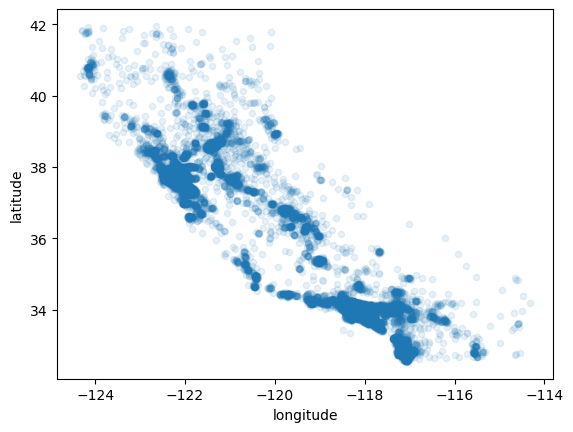

In [31]:
housing_data.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

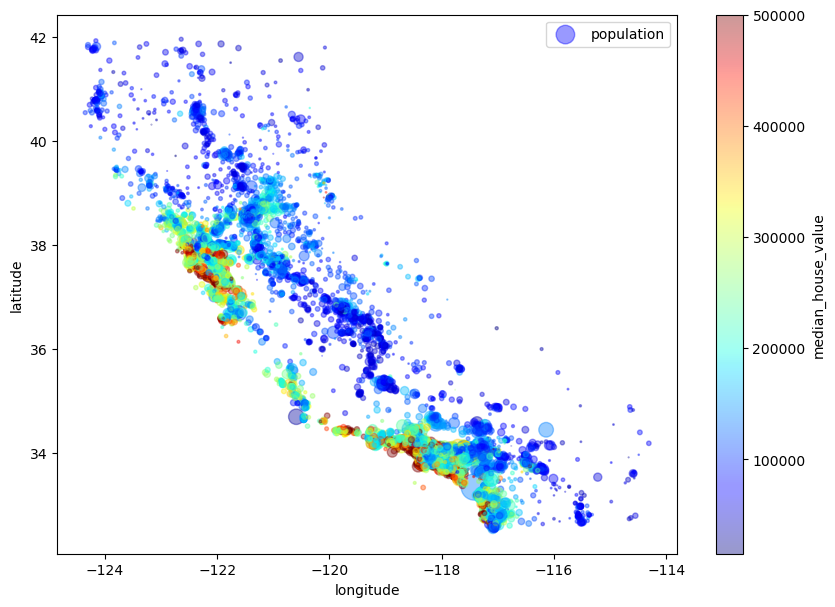

In [32]:
housing_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing_data["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [33]:
corr_matrix = housing_data.corr()

In [34]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

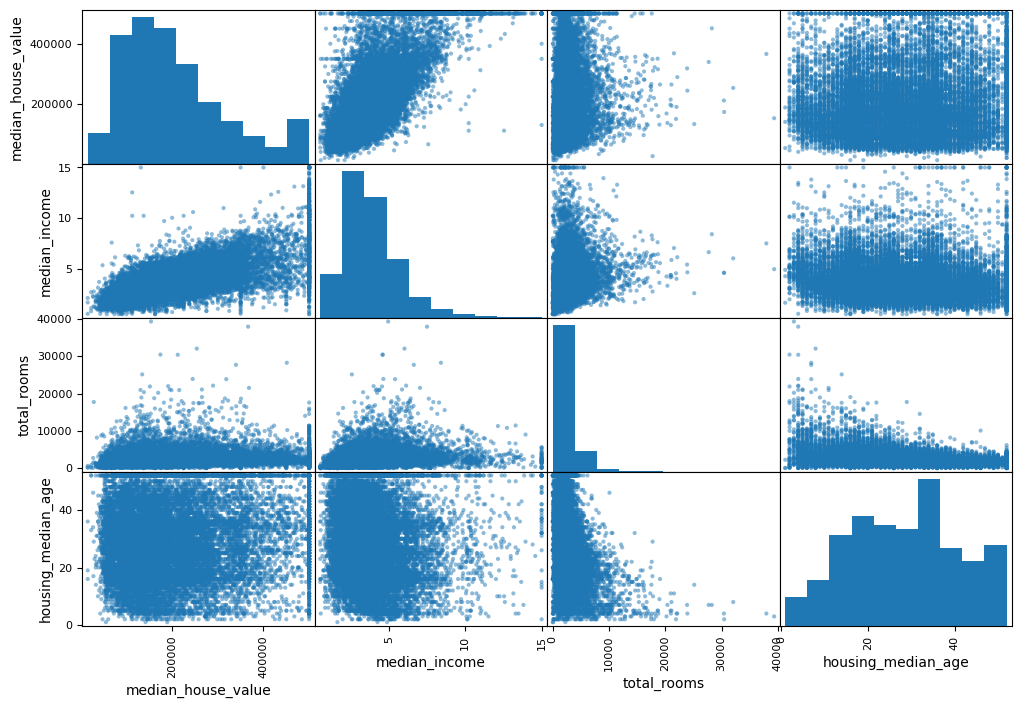

In [35]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing_data[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

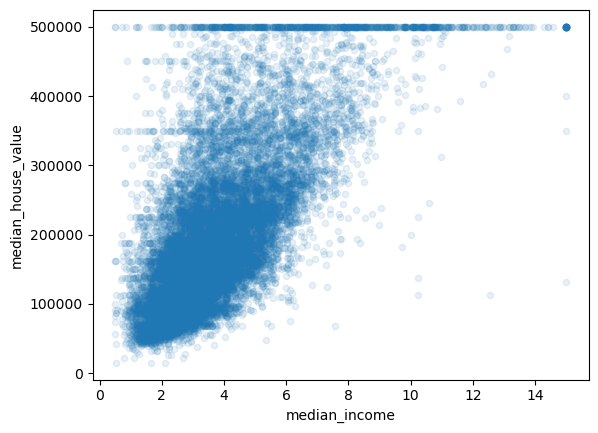

In [36]:
housing_data.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [37]:
housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data["population_per_household"]=housing_data["population"]/housing_data["households"]

In [38]:
corr_matrix = housing_data.corr()

In [39]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [40]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()